# Churn Prediction - Eduardo Chaves

## Pipeline (Data Preprocessing and Machine Learning Modeling)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import joblib

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('./assets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df = df.drop(['customerID'], axis=1)
# dropping unnecessary feature

In [4]:
df.duplicated().sum()
# checking duplicates

22

In [5]:
df.info()
# overview of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
df.TotalCharges.info()
# previously on EDA process was discovered that this
# column is not in a numerical data type

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


### Converting TotalCharges to a numeric data type (float)

In [7]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, downcast='float', errors='coerce')
# converting it to numeric and leaving Null values for the ones that returns an error

In [8]:
df.TotalCharges.dtype

dtype('float32')

In [9]:
df.TotalCharges.isnull().sum()
# there were 11 errors so they were passed as nulls

11

In [10]:
df = df.dropna()
# removing nulls

In [11]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes


### Categorical Encoding

In [13]:
print(df.MultipleLines.unique())
print(df.OnlineSecurity.unique())
# was detected redundant categories in these features (No & No phone...)

['No phone service' 'No' 'Yes']
['No' 'Yes' 'No internet service']


In [14]:
df = df.replace(('No phone service', 'No internet service'), 'No')

print(df.MultipleLines.unique())
print(df.OnlineSecurity.unique())
# removing this redundancy and was detected a slight
# improvement on the machine learning model predictions

['No' 'Yes']
['No' 'Yes']


In [15]:
df.info()
# looking for the feature that are categorical

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [16]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace((0, 1), ('No', 'Yes'))
df['SeniorCitizen'].unique()
# changing the values to string to later on detect as a categorical feature

array(['No', 'Yes'], dtype=object)

In [17]:
numeric_features = df.select_dtypes(np.number)
categorical_features = df.drop(numeric_features, axis=1)
categorical_features.info()
# defining two variables for numerical and categorical features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7032 non-null   object
 1   SeniorCitizen     7032 non-null   object
 2   Partner           7032 non-null   object
 3   Dependents        7032 non-null   object
 4   PhoneService      7032 non-null   object
 5   MultipleLines     7032 non-null   object
 6   InternetService   7032 non-null   object
 7   OnlineSecurity    7032 non-null   object
 8   OnlineBackup      7032 non-null   object
 9   DeviceProtection  7032 non-null   object
 10  TechSupport       7032 non-null   object
 11  StreamingTV       7032 non-null   object
 12  StreamingMovies   7032 non-null   object
 13  Contract          7032 non-null   object
 14  PaperlessBilling  7032 non-null   object
 15  PaymentMethod     7032 non-null   object
 16  Churn             7032 non-null   object
dtypes: object(17)


In [18]:
from sklearn.preprocessing import LabelEncoder

labelEncoder_fit = [(feature, LabelEncoder().fit(df[feature])) for feature in categorical_features]

joblib.dump(labelEncoder_fit, './assets/labelEncoder_fit.jbl')
# exporting the fitted features from the data tu use later on
# the deployed model

for feature, fit in labelEncoder_fit:
  df[feature] = fit.transform(df[feature])
  # transforming the categorical features from string to 1,2,3...

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.850000,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.500000,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.150002,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.750000,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.649994,1


### Correlation Testing

<Axes: >

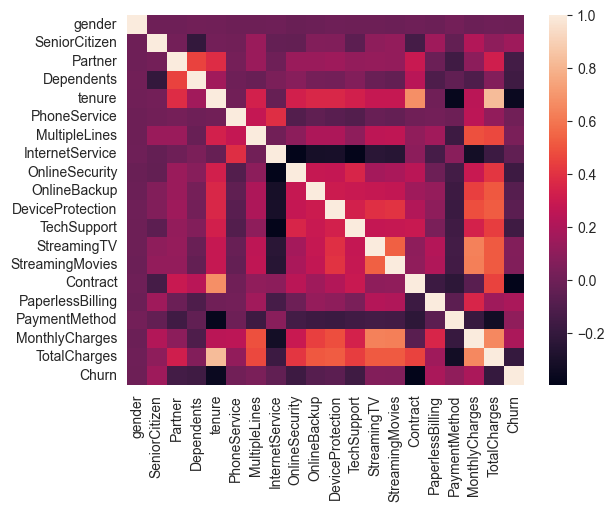

In [19]:
sns.heatmap(df.corr())
# looking for extreme correlations

### Multicollinearity Testing

In [20]:
import statsmodels.api as sm

def calculate_vif(data):
  vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
  x_var_names = data.columns

  for i in range(0, x_var_names.shape[0]):
    y = data[x_var_names[i]]
    x = data[x_var_names.drop([x_var_names[i]])]
    r_squared = sm.OLS(y,x).fit().rsquared
    vif = round(1/(1-r_squared), 2)
    vif_df.loc[i] = [x_var_names[i], vif]

  return vif_df.sort_values(by = 'Vif', axis = 0, ascending = False, inplace = False)

# algorithm to look for extreme multicollinearity (VIF)

In [21]:
calculate_vif(df).head()
# vif before removing some features

,Var,Vif
17,MonthlyCharges,31.49
5,PhoneService,16.03
18,TotalCharges,15.31
4,tenure,14.71
7,InternetService,4.43


In [22]:
drop_cols = ['TotalCharges']
df = df.drop(drop_cols, axis=1)
# after a lot of testing, I detected the best model
# results without this(se) feature(s) above

In [23]:
calculate_vif(df).head()
# vif after removing some features

,Var,Vif
17,MonthlyCharges,28.36
5,PhoneService,15.40
4,tenure,7.59
7,InternetService,4.43
14,Contract,4.16


<Axes: >

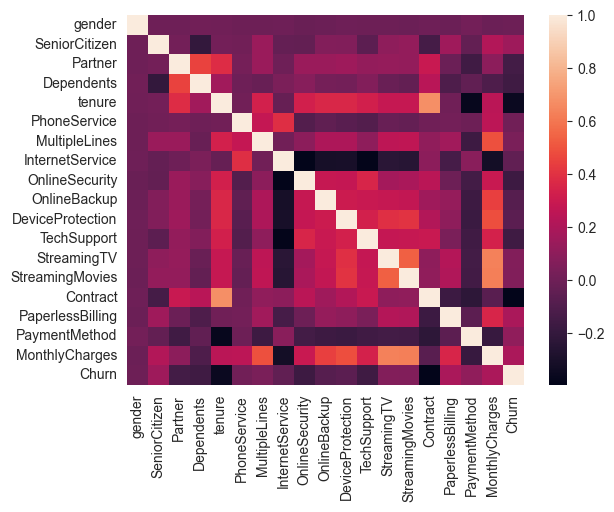

In [24]:
sns.heatmap(df.corr())
# correlation after removing some features

### Change to Categorical Data Type
This will help the model to understand that these features are categorical and not ordinal, so 1 is not lesser than 2, but actually another category

In [25]:
def update_drop_cols(df, drop_cols):
  cols_to_drop = []

  for col in drop_cols:
    cols_to_drop.append(col) if col in df.columns else None

  return df.drop(cols_to_drop, axis=1)

# this function will help to remove the columns that were previously
# dropped some cell ago, without having to manually do it so

In [26]:
categorical_features = update_drop_cols(categorical_features, drop_cols)

for feature in categorical_features.columns:
  df[feature] = df[feature].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   SeniorCitizen     7032 non-null   category
 2   Partner           7032 non-null   category
 3   Dependents        7032 non-null   category
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   category
 6   MultipleLines     7032 non-null   category
 7   InternetService   7032 non-null   category
 8   OnlineSecurity    7032 non-null   category
 9   OnlineBackup      7032 non-null   category
 10  DeviceProtection  7032 non-null   category
 11  TechSupport       7032 non-null   category
 12  StreamingTV       7032 non-null   category
 13  StreamingMovies   7032 non-null   category
 14  Contract          7032 non-null   category
 15  PaperlessBilling  7032 non-null   category
 16  PaymentMethod     7032 n

### Normalization of the Numerical Features

By doing the normalization all numeric values will have 1 and 0 as max e min values. This will help the machine model in its learning process. In this case which is a classification problem it probably won't change its precision. This process has a better outcome when dealing with regression training, but I'll do it to record my learning on this particular process.

In [27]:
from sklearn.preprocessing import MinMaxScaler

numeric_features = update_drop_cols(numeric_features, drop_cols)

minMaxScaler_fit = [(feature, MinMaxScaler().fit(df[feature].values.reshape(-1,1))) for feature in numeric_features]

joblib.dump(minMaxScaler_fit, './assets/minMaxScaler_fit.jbl')
# exporting the fitted features from the data tu use later on
# the deployed model

for feature, scaler in minMaxScaler_fit:
  df[feature] = scaler.transform(df[feature].values.reshape(-1,1))

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,0.000000,0,0,0,0,1,0,0,0,0,0,1,2,0.115423,0
1,1,0,0,0,0.464789,1,0,0,1,0,1,0,0,0,1,0,3,0.385075,0
2,1,0,0,0,0.014085,1,0,0,1,1,0,0,0,0,0,1,3,0.354229,1
3,1,0,0,0,0.619718,0,0,0,1,0,1,1,0,0,1,0,0,0.239303,0
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,1


In [28]:
df.describe()
# now they're all normalized as you can see in the min and max indexes

,tenure,MonthlyCharges
count,7032.000000,7032.000000
mean,0.442560,0.463166
std,0.345708,0.299363
min,0.000000,0.000000
25%,0.112676,0.172512
50%,0.394366,0.518408
75%,0.760563,0.712562
max,1.000000,1.000000


### Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x = df.drop(['Churn'], axis=1)
y = df.Churn

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)

In [32]:
print(f"""
x_train: {x_train.shape} | y_train: {y_train.shape}
x_test: {x_test.shape} | y_test: {y_test.shape}
""")
# Seeing the train and test sizes


x_train: (4711, 18) | y_train: (4711,)
x_test: (2321, 18) | y_test: (2321,)



### Balancing the Training Data Set

In [33]:
y_train.value_counts()
# Out data set has a big unbalance on the target feature, which makes more
# difficult to our model identify future cases of the lesser outcome

0    3452
1    1259
Name: Churn, dtype: int64

In [34]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
# as we don't have a big data set, I dicided to use the SMOTE over sampling method
# so we'll equilibate the target feature to the greater amount, by appending new data
# based on the data we already have

In [35]:
x_train, y_train = smote.fit_resample(x_train, y_train)
y_train.value_counts()
# perfect balance!

0    3452
1    3452
Name: Churn, dtype: int64

In [36]:
print(f"""
x_train: {x_train.shape} | y_train: {y_train.shape}
x_test: {x_test.shape} | y_test: {y_test.shape}
""")
# our test set is the same as size and values, but our training set
# now have more values to improve our model training


x_train: (6904, 18) | y_train: (6904,)
x_test: (2321, 18) | y_test: (2321,)



---
## 3. Creating the Machine Learning Model

### Criação

In [37]:
import lightgbm as lgbm
from sklearn.model_selection import cross_val_score, GridSearchCV

In [38]:
model = lgbm.LGBMClassifier(seed=42, objective='binary')
# using the LGBM classifier model (light gradient-boosting machine) with
# a binary objective (churn or not churn)

In [39]:
cross_val_score(model, x_train, y_train, cv=5).mean()
# I used this cross validation to help me see a general precision
# when I was testing different preprocessing methods for the pipeline

0.8483581525674525

#### Grid Search
Searching for the best hyperparameters for the LGBM model

> I decided to not use this technique after my testing show none improvements by comparing with the default hyperparameters defined by the LGBM model, and because this step was consuming much time and resources that for me wasn't worth it, especially because of none improvements it got after all

In [40]:
# grid = GridSearchCV(lgbm.LGBMClassifier(), {
#     'boosting_type': ['dart', 'gbdt'],
#     'num_iterations': [400, 600],
#     'learning_rate': [.1, .05],
#     'num_leaves': [50, 70],
#     'max_depth': [7, 8],
#     'seed': [42],
#     'early_stopping_round': [5],
# }, cv=5)

# # defining the different parameters to combine and test, with a cross validation of 5 folds

In [41]:
# grid.fit(x_train, y_train)
# # putting the grid search to work/test

In [42]:
# grid.best_score_
# # getting the best cross validation score of all test made from grid search

In [43]:
# best_parameters = grid.best_params_
# best_parameters
# # seeing the best parameters found

In [44]:
# model = lgbm.LGBMClassifier(
#   num_leaves = best_parameters['num_leaves'],
#   max_depth = best_parameters['max_depth'],
#   boosting_type = best_parameters['boosting_type'],
#   learning_rate = best_parameters['learning_rate'],
#   num_iterations = best_parameters['num_iterations'],
#   seed = 42,
#   objective = 'binary',
# )
# # definig the definitive model with the best parameters found by grid search

### Evaluation / Testing

In [45]:
from sklearn import metrics

In [46]:
model.fit(x_train, y_train)
# putting our definitive model to train is the train set

LGBMClassifier(objective='binary', seed=42)

In [47]:
y_predict = model.predict(x_test)
y_predict_proba = model.predict_proba(x_test)
# making the predictions with the test set to evaluate

In [48]:
print(metrics.classification_report(y_test, y_predict))
# seeing the prediction results

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1711
           1       0.57      0.63      0.60       610

    accuracy                           0.78      2321
   macro avg       0.72      0.73      0.72      2321
weighted avg       0.79      0.78      0.78      2321



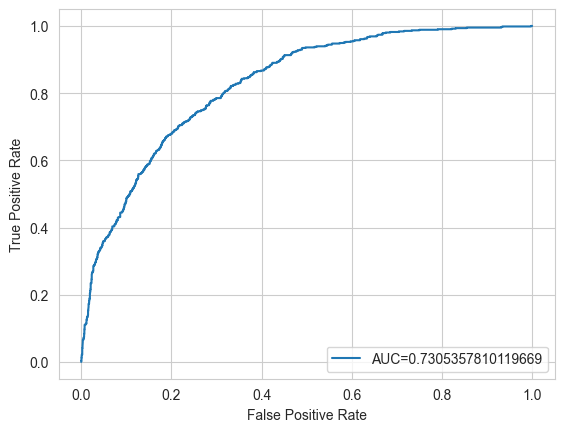

In [49]:
false_positive_roc, true_positive_roc, _ = metrics.roc_curve(y_test, y_predict_proba[:,1])
roc_auc_score = metrics.roc_auc_score(y_test, y_predict)

plt.plot(false_positive_roc,true_positive_roc,label="AUC="+str(roc_auc_score))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
# seeing the results with the AUC ROC curve

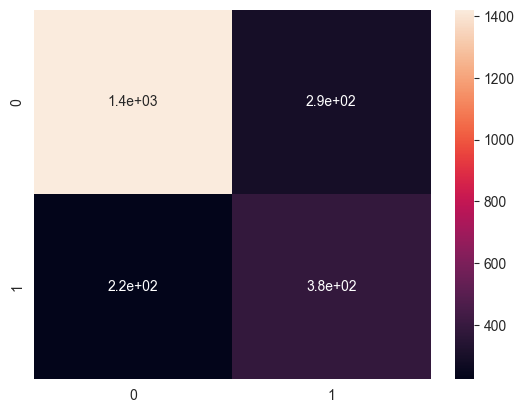

In [50]:
sns.heatmap(metrics.confusion_matrix(y_test, y_predict), annot=True)
plt.show()
# seeing the results with the confusion matrix

### Interpreting our Machine Learning Model

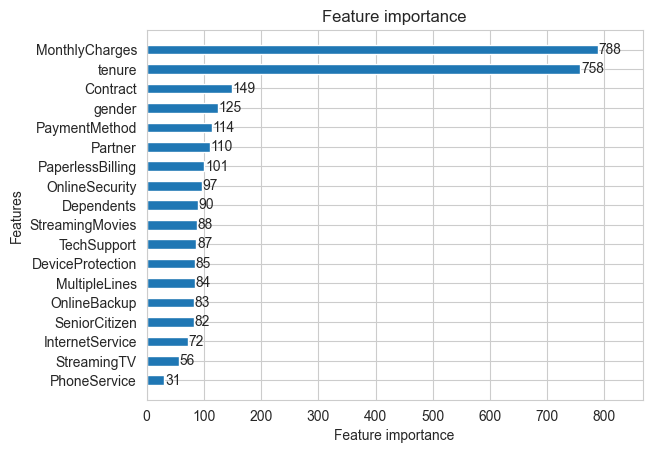

In [51]:
fig = lgbm.plot_importance(model, height=.5)
plt.show()

In [52]:
# fig = fig.figure
# fig.savefig('./assets/graphs/feature-importance.png', dpi=300, bbox_inches='tight')
# # saving this plot to use in the streamlit front-end application

### Salvando o modelo final em um arquivo a parte

In [53]:
# joblib.dump(model, './assets/churn-prediction-model.jbl')
# # saving our final model to use in out deploy application

['./assets/churn-prediction-model.jbl']